In [12]:
from seiches_time_series import *

import sys
from pathlib import Path

pydrever_parent_path = Path("C:/src/pydrever")
if str(pydrever_parent_path) not in sys.path:
    sys.path.append(str(pydrever_parent_path))
    print("Added python parent directory: " + str(pydrever_parent_path))

import pydrever
print(pydrever.__file__)

C:\src\pydrever\pydrever\__init__.py


In [13]:
from pydrever.io import prflreader

schematization = prflreader.read(r"n:\Projects\11211500\11211573\B. Measurements and calculations\001 HB - seiches\Profielen\LocatieA_AHN.prfl")
schematization.foreshore_slope = 0.01
schematization.z_bottom = min(schematization.z_positions) - 1.0
print(schematization)

dike_orientation=250.0 x_positions=[0.0, 10.4, 15.8] z_positions=[-0.2, 5.2, 6.8] roughnesses=[1.0, 1.0] x_outer_toe=0.0 x_outer_crest=15.8 x_crest_outer_berm=None x_notch_outer_berm=None x_inner_crest=None x_inner_toe=None foreshore_slope=0.01 z_bottom=-1.2


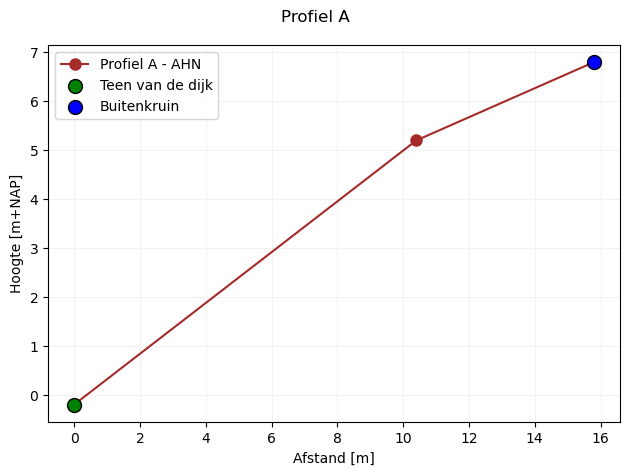

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=1, nrows=1)
fig.suptitle("Profiel A")
axs.plot(schematization.x_positions, schematization.z_positions,'brown',zorder=1, marker='o', markersize=8, label='Profiel A - AHN')
axs.scatter(schematization.x_outer_toe,schematization.z_positions[0],s=100,zorder=2,marker='o', c='green', edgecolors='k', label='Teen van de dijk')
axs.scatter(schematization.x_outer_crest,schematization.z_positions[-1],s=100,zorder=3,marker='o', c='blue', edgecolors='k', label='Buitenkruin')
axs.grid(True,color=(0.95,0.95,0.95))
axs.set(ylabel='Hoogte [m+NAP]', xlabel='Afstand [m]')
axs.set_axisbelow(True)
axs.legend()

fig.tight_layout()

In [15]:
from seiches_time_series import *

time_series_no_seiche = generate_surge(type=SeicheType.NoSeiches)
time_series_nse = generate_surge(type=SeicheType.Nse)
time_series_scn_1 = generate_surge(type=SeicheType.BasePeriod)
time_series_scn_2 = generate_surge(type=SeicheType.TwoPeaks)
time_series_scn_3 = generate_surge(type=SeicheType.LeftPeak)
time_series_scn_4 = generate_surge(type=SeicheType.RightPeak)
time_series_scn_5 = generate_surge(type=SeicheType.ThreePeriods)

In [16]:
time_series1 = read_signal_from_file(
        "N:/Projects/11211500/11211573/B. Measurements and calculations/001 HB - seiches/Tijdreeksen/Gemeten/seiche_peak_1_timeseries.txt"
    )
time_series2 = read_signal_from_file(
        "N:/Projects/11211500/11211573/B. Measurements and calculations/001 HB - seiches/Tijdreeksen/Gemeten/seiche_peak_2_timeseries.txt"
    )
time_series3 = read_signal_from_file(
        "N:/Projects/11211500/11211573/B. Measurements and calculations/001 HB - seiches/Tijdreeksen/Gemeten/seiche_peak_3_timeseries.txt"
    )
time_series4 = read_signal_from_file(
        "N:/Projects/11211500/11211573/B. Measurements and calculations/001 HB - seiches/Tijdreeksen/Gemeten/seiche_peak_4_timeseries.txt"
    )
time_series5 = read_signal_from_file(
        "N:/Projects/11211500/11211573/B. Measurements and calculations/001 HB - seiches/Tijdreeksen/Gemeten/seiche_peak_5_timeseries.txt"
    )
time_series6 = read_signal_from_file(
        "N:/Projects/11211500/11211573/B. Measurements and calculations/001 HB - seiches/Tijdreeksen/Gemeten/seiche_peak_6_timeseries.txt"
    )
time_series7 = read_signal_from_file(
        "N:/Projects/11211500/11211573/B. Measurements and calculations/001 HB - seiches/Tijdreeksen/Gemeten/seiche_peak_7_timeseries.txt"
    )
time_series8 = read_signal_from_file(
        "N:/Projects/11211500/11211573/B. Measurements and calculations/001 HB - seiches/Tijdreeksen/Gemeten/seiche_peak_8_timeseries.txt"
    )

In [17]:
import numpy
import matplotlib.pyplot as plt


from pydrever.visualization import (
    plot_damage_levels,
    plot_hydrodynamic_conditions,
    plot_development_per_location,
)

import pydrever.data as data
from pydrever.calculation import Dikernel

In [18]:
def get_hydrodynamics(series, dike_orientation):
    water_levels = series.water_levels[:-1]
    wave_heights = np.full(len(water_levels), 2.2)
    wave_periods = np.full(len(water_levels), 7.5)
    wave_directions = np.full(len(water_levels), dike_orientation)

    return data.HydrodynamicConditions(
        time_steps=series.times, 
        water_levels=water_levels, 
        wave_heights=wave_heights, 
        wave_periods=wave_periods, 
        wave_directions=wave_directions
    )

In [19]:
def add_output_locations(x_locations:list[float], input: data.DikernelInput):
    for x_location in x_locations:
        input.add_output_location(
            x_location=x_location, 
            top_layer_specification=data.GrassWaveImpactLayerSpecification(
                top_layer_type=data.TopLayerType.GrassClosedSod)
            )

    for x_location in x_locations:
        input.add_output_location(
            x_location=x_location, 
            top_layer_specification=data.AsphaltLayerSpecification(
                top_layer_specification=data.TopLayerType.Asphalt,
                flexural_strength=0.9,
                soil_elasticity=64.0,
                upper_layer_thickness=0.2,
                upper_layer_elasticity_modulus=5712.0)
            )
        
    for x_location in x_locations:
        input.add_output_location(
            x_location=x_location, 
            top_layer_specification=data.GrassWaveRunupLayerSpecification(
                top_layer_type=data.TopLayerType.GrassClosedSod,
                outer_slope=0.3) #TODO: derive from schematization
            )
    
    # TODO: Requires inner crest
    # input.add_output_location(
    #     x_location=max(x_locations),
    #     top_layer_specification=data.GrassOvertoppingLayerSpecification(          
    #         top_layer_type=data.TopLayerType.GrassClosedSod
    #     )
    # )

In [20]:

output_locations = np.arange(1.0, 15.0, 1.0)
series_list = [
    ["Geen seiches", time_series_no_seiche],
    ["NSE", time_series_nse],
    ["Basis periode (scenario 1)", time_series_scn_1],
    ["Twee pieken (scenario 2)", time_series_scn_2],
    ["Piek links (scenario 3)", time_series_scn_3],
    ["Piek rechts (scenario 4)", time_series_scn_4],
    ["Drie periodes (scenario 5)", time_series_scn_5],
]

In [21]:
results = {}

for time_series in series_list:
    hydrodynamics = get_hydrodynamics(time_series[1], schematization.dike_orientation)

    input = data.DikernelInput(dike_schematization=schematization, hydrodynamic_input=hydrodynamics)
    add_output_locations(output_locations.tolist(), input)
    kernel = pydrever.calculation.Dikernel(input)
    
    runresult = kernel.run()
    if not runresult:
        for m in kernel.errors:
            print(m)
            
    results[time_series[0]] = {"input":input, "time_series": time_series, "output":kernel.output}

Geen seiches
Grass wave impact     :4.3, locatie x=3.0
Grass wave runup      :0.01, locatie x=9.0
Asphalt               :0.45, locatie x=2.0
NSE
Grass wave impact     :5.72, locatie x=4.0
Grass wave runup      :0.01, locatie x=10.0
Asphalt               :0.42, locatie x=3.0
Basis periode (scenario 1)
Grass wave impact     :4.43, locatie x=4.0
Grass wave runup      :0.01, locatie x=9.0
Asphalt               :0.44, locatie x=2.0
Twee pieken (scenario 2)
Grass wave impact     :4.59, locatie x=4.0
Grass wave runup      :0.01, locatie x=9.0
Asphalt               :0.45, locatie x=2.0
Piek links (scenario 3)
Grass wave impact     :4.51, locatie x=4.0
Grass wave runup      :0.01, locatie x=9.0
Asphalt               :0.44, locatie x=2.0
Piek rechts (scenario 4)
Grass wave impact     :4.51, locatie x=4.0
Grass wave runup      :0.01, locatie x=9.0
Asphalt               :0.44, locatie x=2.0
Drie periodes (scenario 5)
Grass wave impact     :4.47, locatie x=4.0
Grass wave runup      :0.01, locatie x

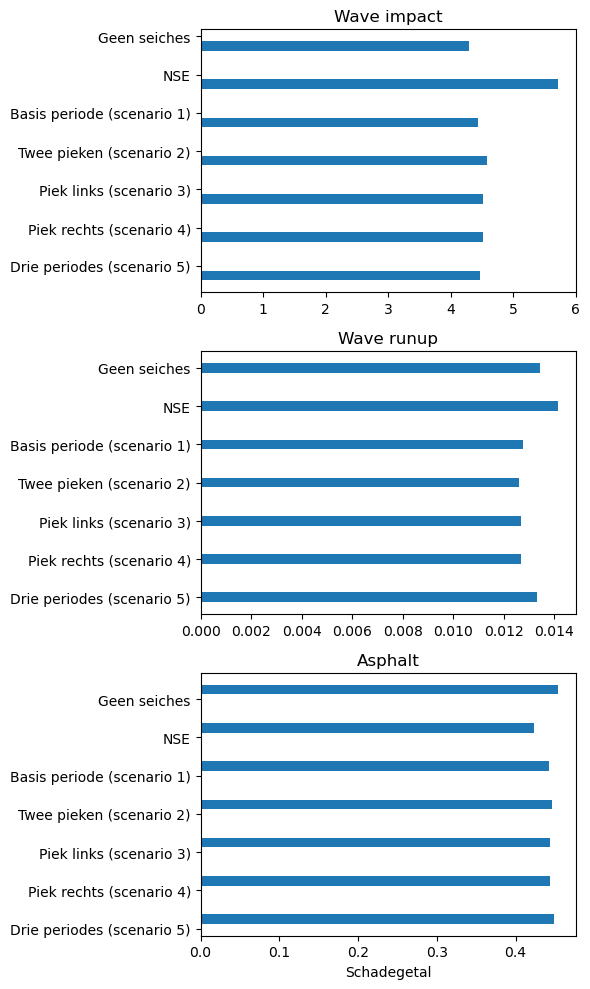

In [34]:
def print_output(output):
    max_location = max(output, key=lambda obj: obj.final_damage)
    max_damage = max_location.final_damage
    print(str(round(max_damage,2)) + ", locatie x=" + str(max_location.x_position))

grass_wave_impact_damages = []
grass_wave_runup_damages = []
asphalt_damages = []
series_names = []
for r in results:
    series_names.append(r)

    output = results[r]["output"]

    grass_wave_impact_output = [outp for outp in output if type(outp) is data.GrassWaveImpactOutputLocation]
    grass_wave_runup_output = [outp for outp in output[:-1] if type(outp) is data.GrassCumulativeOverloadOutputLocation]
    #grass_wave_overtopping_output = output[-1]
    asphalt_output = [outp for outp in output if type(outp) is data.AsphaltWaveImpactOutputLocation]

    grass_wave_impact_damages.append(max([o.final_damage for o in grass_wave_impact_output]))
    grass_wave_runup_damages.append(max([o.final_damage for o in grass_wave_runup_output]))
    asphalt_damages.append(max([o.final_damage for o in asphalt_output]))

    print(r)
    print("Grass wave impact     :", end="")
    print_output(grass_wave_impact_output)
    print("Grass wave runup      :", end="")
    print_output(grass_wave_runup_output)
    #print("Grass wave overtopping:", end="")
    #print_output(grass_wave_overtopping_output)
    print("Asphalt               :", end="")
    print_output(asphalt_output)

grass_wave_impact_damages.reverse()
grass_wave_runup_damages.reverse()
asphalt_damages.reverse()
series_names.reverse()

x = numpy.arange(len(series_names))
width = 0.25

fig, axs = plt.subplots(ncols=1,nrows=3,figsize=(6,10))

# Create bars
axs[0].barh(x - width, grass_wave_impact_damages, width, label="Wave impact")
axs[1].barh(x, grass_wave_runup_damages, width, label="Wave runup")
axs[2].barh(x + width, asphalt_damages, width, label="Asphalt")

# Labels and title
axs[0].set_title("Wave impact")
axs[0].set_yticks(x)
axs[0].set_yticklabels(series_names)
axs[1].set_title("Wave runup")
axs[1].set_yticks(x)
axs[1].set_yticklabels(series_names)
axs[2].set_title("Asphalt")
axs[2].set_yticks(x)
axs[2].set_yticklabels(series_names)
axs[2].set_xlabel("Schadegetal")

plt.tight_layout()
plt.show()

In [ ]:
actual_time_series_list = [
    ["Werkelijk 1", time_series1],
    ["Werkelijk 2", time_series2],
    ["Werkelijk 3", time_series3],
    ["Werkelijk 4", time_series4],
    ["Werkelijk 5", time_series5],
    ["Werkelijk 6", time_series6],
    ["Werkelijk 7", time_series7],
    ["Werkelijk 8", time_series8],
    ]

results_actual_series = {}

for time_series in actual_time_series_list:
    hydrodynamics = get_hydrodynamics(time_series[1], schematization.dike_orientation)
    input = data.DikernelInput(dike_schematization=schematization, hydrodynamic_input=hydrodynamics)
    for x_location in output_locations:
        input.add_output_location(
            x_location=x_location, 
            top_layer_specification=data.GrassWaveImpactLayerSpecification(
                top_layer_type=data.TopLayerType.GrassClosedSod)
            )
    kernel = pydrever.calculation.Dikernel(input)
    runresult = kernel.run()

    time_series[1].filtered = True
    hydrodynamics_filtered = get_hydrodynamics(time_series[1], schematization.dike_orientation)
    input_filtered = data.DikernelInput(dike_schematization=schematization, hydrodynamic_input=hydrodynamics_filtered)
    for x_location in output_locations:
        input_filtered.add_output_location(
            x_location=x_location, 
            top_layer_specification=data.GrassWaveImpactLayerSpecification(
                top_layer_type=data.TopLayerType.GrassClosedSod)
            )
    kernel_filtered = pydrever.calculation.Dikernel(input_filtered)
    runresult_filtered = kernel_filtered.run()

    results_actual_series[time_series[0]] = {"time_series": time_series, "input":input, "output":kernel.output, "input_filtered":input_filtered, "output_filtered":kernel_filtered.output }

In [ ]:
for r in results_actual_series:
    output = results_actual_series[r]["output"]
    output_filtered = results_actual_series[r]["output_filtered"]
    max_location = max(output, key=lambda obj: obj.damage_development[-1])
    max_location_filtered = max(output_filtered, key=lambda obj: obj.damage_development[-1])

    max_damage = max_location.damage_development[-1]
    max_damage_filtered = max_location_filtered.damage_development[-1]
    
    print(r + ": " + str(round(max_damage,2)) + " (" + str(round(max_damage_filtered,2)) + ")" + ", locatie x=" + str(max_location.x_position) + " / " + str(max_location_filtered.x_position) )

In [ ]:
last_storm_series = actual_time_series_list[-3]
last_result = results_actual_series[last_storm_series[0]]

input = last_result["input"]
measured_result = last_result["output"]
filtered_result = last_result["output_filtered"]

fig, axs = plt.subplots(ncols=1, nrows=2)
fig.suptitle("Profiel A - werkelijke storm 8")
axs[0].plot(last_storm_series[1].times[:-1], measured_result[5].damage_development,'brown',zorder=1, label='gemeten (locatie ' + str(measured_result[5].x_position) + ')')
axs[0].plot(last_storm_series[1].times[:-1], filtered_result[5].damage_development,'green',zorder=1, label='gefilterd (locatie ' + str(measured_result[5].x_position) + ')')
axs[0].plot(last_storm_series[1].times[:-1], measured_result[6].damage_development,'brown',zorder=1, label='gemeten (locatie ' + str(measured_result[5].x_position) + ')')
axs[0].plot(last_storm_series[1].times[:-1], filtered_result[6].damage_development,'green',zorder=1, label='gefilterd (locatie ' + str(measured_result[5].x_position) + ')')

axs[0].grid(True,color=(0.95,0.95,0.95))
axs[0].set(ylabel='Schadeniveau [m+NAP]', xlabel='Tijd [seconden]')
axs[0].set_axisbelow(True)
axs[0].legend()

ax_left = axs[1]             # left y-axis
ax_right = ax_left.twinx() 

ax_right.plot(schematization.x_positions, schematization.z_positions,'orange', label="Dwarsprofiel")
ax_left.scatter([l.x_position for l in measured_result], [l.final_damage for l in measured_result], c='brown',label="Gemeten")
ax_left.scatter([l.x_position for l in filtered_result], [l.final_damage for l in filtered_result], c='green',label="Gefilterd")

ax_right.set_ylabel("Hoogte [m + NAP]")
ax_left.set_ylabel("Schadeniveau [-]")
axs[1].set_xlabel("Afstand [m]")
axs[1].grid(True,color=(0.95,0.95,0.95))
axs[1].set_axisbelow(True)
axs[1].legend()

fig.tight_layout()